In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_processing import load_data, clean_data, scale_features
from src.pca_analysis import run_pca
from src.clustering import run_kmeans

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

In [4]:
# Load the data
df = load_data("Stars.csv")
df = clean_data(df)

X_scaled, _ = scale_features(df)
X_pca, _ = run_pca(X_scaled)
_, labels = run_kmeans(X_pca, n_clusters=6)

df["Cluster"] = labels

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


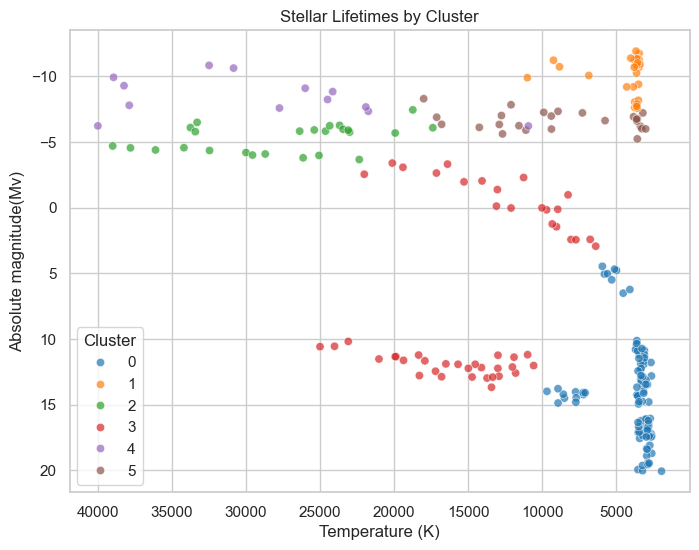

In [6]:
# Temperature vs. Magnitude
sns.scatterplot(
    x="Temperature (K)",
    y="Absolute magnitude(Mv)",
    hue="Cluster",
    data=df,
    palette="tab10",
    alpha=0.7
)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Stellar Lifetimes by Cluster")
plt.show()

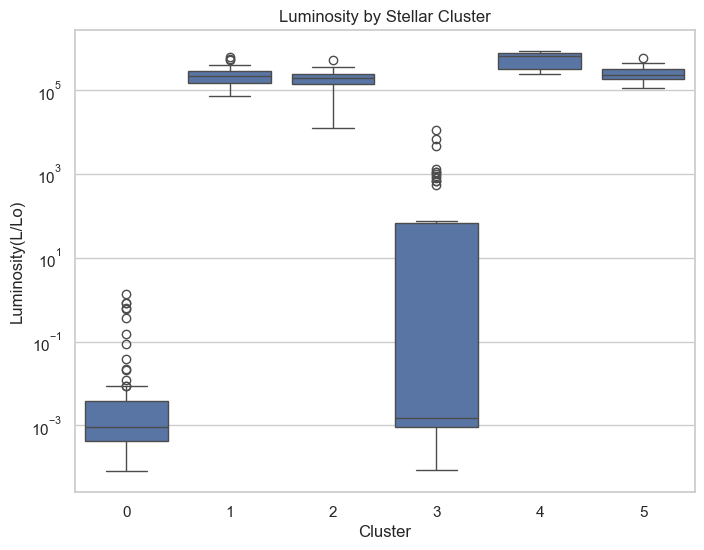

In [8]:
# Luminosity Across Clusters
sns.boxplot(
    x="Cluster",
    y="Luminosity(L/Lo)",
    data=df
)
plt.yscale("log")
plt.title("Luminosity by Stellar Cluster")
plt.show()

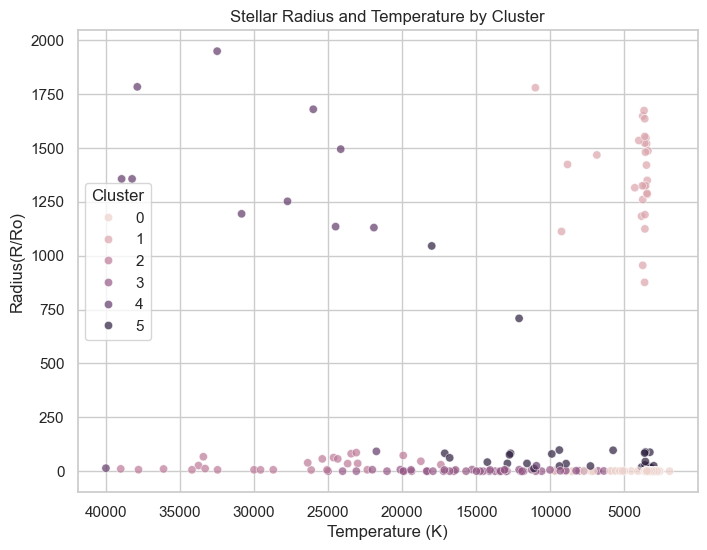

In [12]:
# Radius vs. Temperature
sns.scatterplot(
    x="Temperature (K)",
    y="Radius(R/Ro)",
    hue="Cluster",
    data=df,
    alpha=0.7
)

plt.gca().invert_xaxis()
plt.title("Stellar Radius and Temperature by Cluster")
plt.show()